Idea for outline of paper, following Adams et al. 2017 Frontal Circulation and Submesoscale Variability during the Formation of a Southern
Ocean Mesoscale Eddy
Leading from Julia's work, what can we learn about the smaller scale processes along the edge of the filaments that were not captured by the drifters. Particularly, are they susceptible to submesoscale instabilities, which presumably would lead to downscale energy cascade to dissipation.
Comparison between filament and upwelling fronts: difficult due to lack of scanfish data at upwelling fronts, but perhaps possible in more qualitative sense. Or with glider or Catamaran data. The paper is essentially laid out like Adams et al. 2017.

In [1]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
import urllib.request
import xarray as xr
import pandas as pd
import glob
import os
from datetime import datetime
from collections import OrderedDict
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from oceans.datasets import etopo_subset
from oceans.sw_extras import gamma_GP_from_SP_pt
from matplotlib.patches import Polygon
import gsw
from matplotlib import animation, rc
from IPython.display import HTML
import scipy.io

os.chdir("/Users/North/Drive/Work/UniH_Work/DataAnalysis/jlab_files") # need to set working directory to get the next step to work
from Benguela.src.met132_ctd_ladcp_functions import load_combine_ladcp_ctd_data #import load_ctd_data
from Benguela.src.met132_scanfish_sadcp_functions import load_combine_sadcp_scanfish_data #import load_ctd_data
import Benguela.src.met132_plotting_functions as fg

Load the data

In [2]:
filenames = ["/Users/North/Documents/temp_offline_backups/mmap/etopo1/etopo1_namibia_coast.nc",
             "/Volumes/ExtraBackup/finished_work/Meteor_MET132_ADCP_Processing/ADCPprocessing/rawdata/MET_132/Analysis/maps_images/A2016329.L3m_DAY_SST_sst_4km.nc",
             "/Volumes/ExtraBackup/finished_work/Meteor_MET132_ADCP_Processing/ADCPprocessing/rawdata/MET_132/Analysis/maps_images/A2016324.L3m_DAY_SST_sst_4km.nc",
             "/Volumes/ExtraBackup/finished_work/Meteor_MET132_ADCP_Processing/ADCPprocessing/rawdata/MET_132/Analysis/maps_images/nrt_global_allsat_msla_h_20161128_20161128.nc",
             "/Users/North/Drive/Work/UniH_Work/DataAnalysis/Data/MET_132/Gliders/sebastian_gps_data.mat"]
# ====== load bathymetry
topo = xr.open_dataset(filenames[0])
# ====== load SST map
sst_map = xr.open_dataset(filenames[2]) # lat,lon,sst
sst_map1 = xr.open_dataset(filenames[1]) # lat,lon,sst
# ====== load SSH map
ssh_map = xr.open_dataset(filenames[3]) # lat,lon,sst
# ====== load glider track
# Load in file and call it mat
mat = scipy.io.loadmat(filenames[4]) # check what variables are there (in the dictionary): #mat.keys()
date_t = [datetime.utcfromtimestamp(i) for i in mat['t'][0,:]] # Convert time axis to date form:
glider_track = xr.DataArray(np.append(mat['lon'],mat['lat'],axis=0),coords=[('lon_lat',['lon','lat']), ('time', date_t)])
# ====== load SADCP and Scanfish data
pathScanData = r'/Users/North/Drive/Work/UniH_Work/DataAnalysis/Data/MET_132/Scanfish/'   
fileSADCPdata = r'/Users/North/Drive/Work/UniH_Work/DataAnalysis/Data/MET_132/SADCP/met_132_os75nb.nc'
scan_sadcp, scanfish, sadcp = load_combine_sadcp_scanfish_data(fileSADCPdata,pathScanData,grid_dx=750,grid_dz=5)
# ====== load CTD and LADCP data
pathCTDdata = r'/Users/North/Drive/Work/UniH_Work/DataAnalysis/Data/MET_132/CTD_calibrated/Down_Casts/1db_mean/data/'                     # use your path
pathLADCPdata = r'/Users/North/Drive/Work/UniH_Work/DataAnalysis/Data/MET_132/LADCP/profiles/'                     # use your path
ctd_ladcp, ctd, ladcp = load_combine_ladcp_ctd_data(pathLADCPdata, pathCTDdata)

# plot settings
font = {'family' : 'normal','weight' : 'normal','size'   : 16}
matplotlib.rc('font', **font)

a. Overview of region, upwelling and filament feature observed during cruise

/Users/North/anaconda/envs/work3/lib/python3.6/site-packages/matplotlib/font_manager.py:1339: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


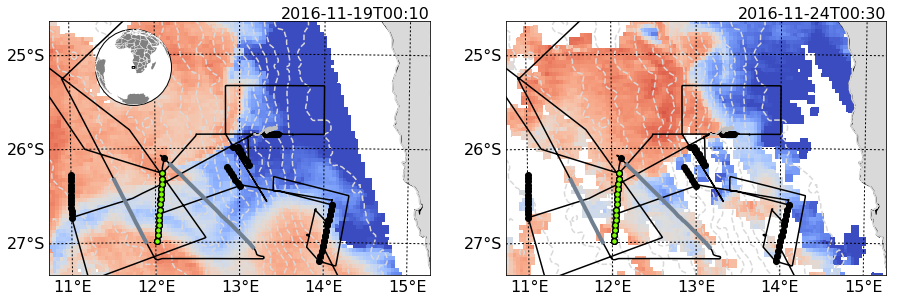

In [3]:
# map plots of cruise and sections
trans_ind = slice(0,2)
fg.plot_map_view(sadcp, ctd, glider_track, ladcp, scanfish, scan_sadcp[trans_ind], ctd_ladcp[trans_ind],
                              topo,sst_map,sst_map1,x_lim=[0,150])


b. Cross-frontal variability; description of filament fronts

/Users/North/anaconda/envs/work3/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)
/Users/North/anaconda/envs/work3/lib/python3.6/site-packages/matplotlib/font_manager.py:1339: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


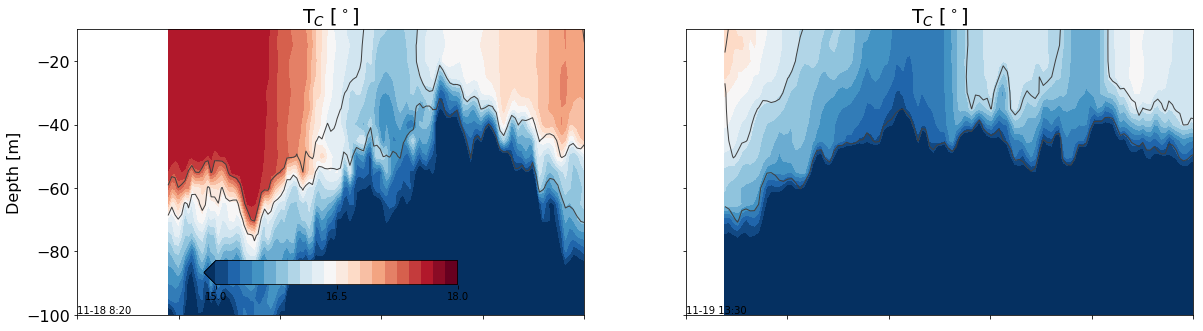

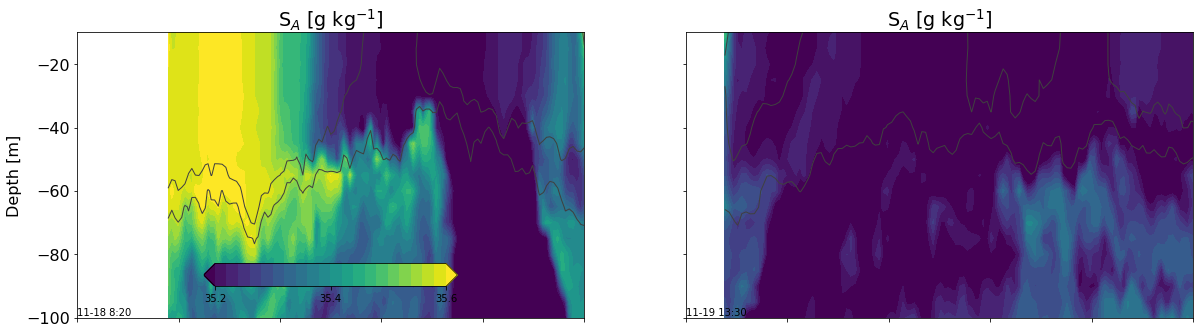

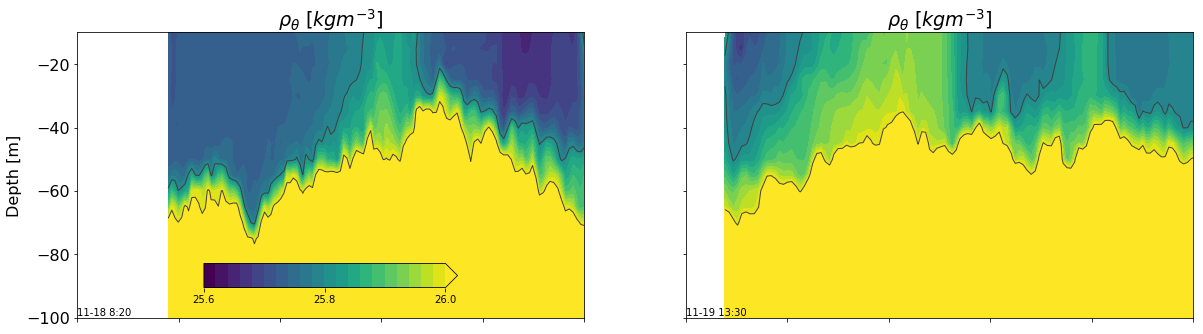

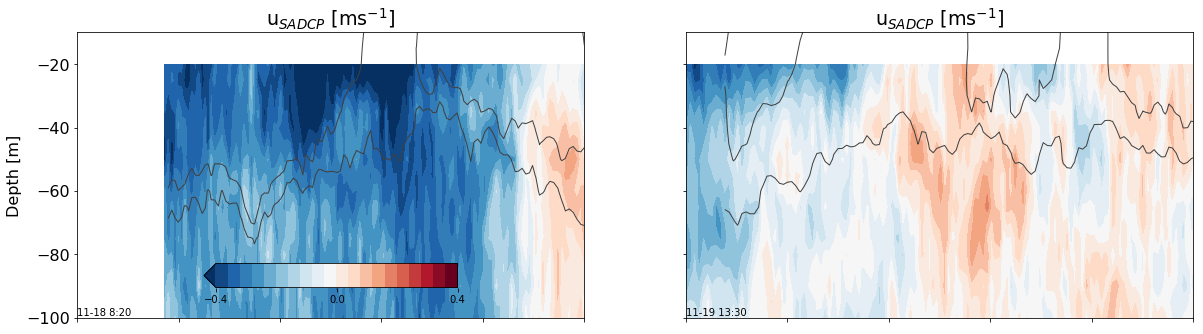

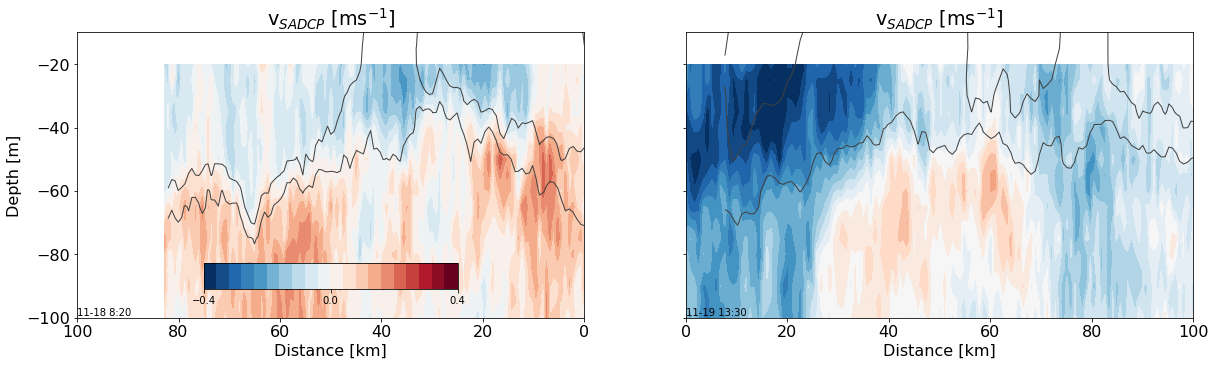

In [4]:
# each call to plot_profile_view makes a row of plots for the variable "var_names"
# The dates in the lower left hand corners indicate the start of the section
# All colorbars are consistent for all instruments
trans_ind = slice(0,2)
x_lim = [0,100]
y_lim = [-100,-10]
var_names = list(('CT',''))
fg.plot_profile_view(scan_sadcp[trans_ind], None, var_names, x_lim=x_lim, y_lim=y_lim)
var_names = list(('SA',''))
fg.plot_profile_view(scan_sadcp[trans_ind], None, var_names, x_lim=x_lim, y_lim=y_lim)
var_names = list(('sigma_0',''))
fg.plot_profile_view(scan_sadcp[trans_ind], None, var_names, x_lim=x_lim, y_lim=y_lim)
var_names = list(('u',''))
fg.plot_profile_view(scan_sadcp[trans_ind], None, var_names, x_lim=x_lim, y_lim=y_lim)
var_names = list(('v',''))
fg.plot_profile_view(scan_sadcp[trans_ind], None, var_names, x_lim=x_lim, y_lim=y_lim, last_row_flag=1)

# filament not cut off from deeper water; is there upwelling along isopycnals?
# compare geostrophic velocities with measured to get ageostrophic component
# how does currents vary across filament, where are maxima; use LADCP repeate transects to see how this changes in time, effect of storm

c. Frontal circulation from drifter data

In [5]:
### NEED DATA

d. Estimate vertical velocity

In [6]:
### NEED CALC

e. Submesoscale instabilities
Compare to microstructure

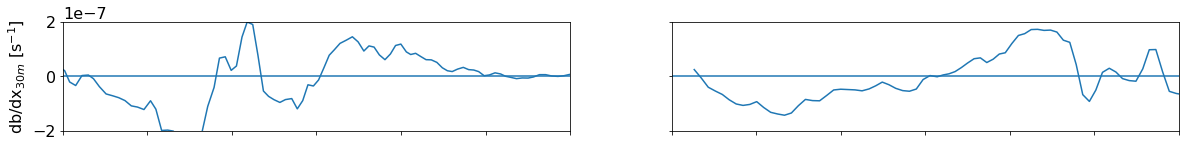

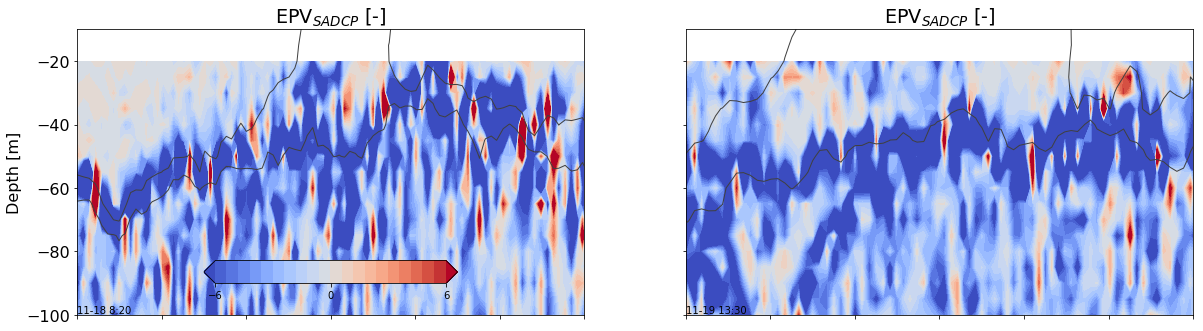

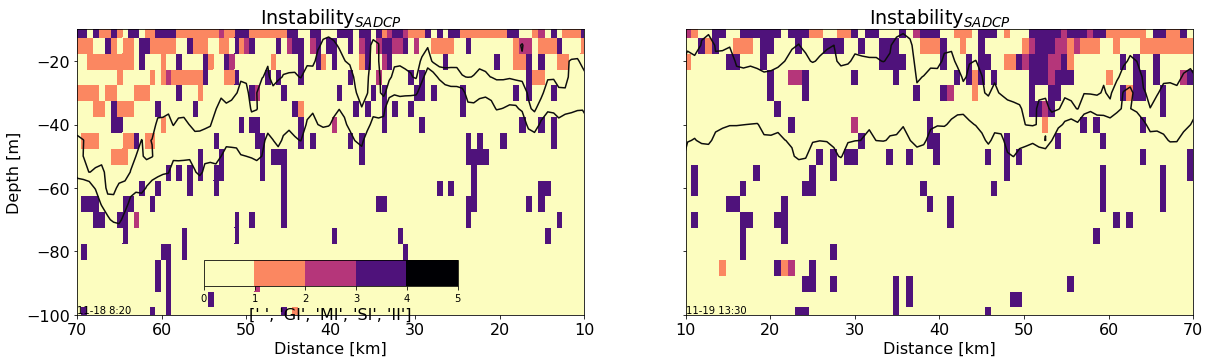

In [7]:
trans_ind = slice(0,2)
x_lim = [10,70]
# add db/dz at 20 m water depth to indicate front location
fg.plot_line_at_one_depth(scan_sadcp[trans_ind], 'db_dx', depth_in=-30, window=10, x_lim=x_lim)

# plotting Ertel Potential Vorticity 
# Where EPV > 0, instabilities may form; the type of Instability can be determined using Rib
# thin contour lines show density, trying to locate the filament approximately
y_lim = [-100,-10]
var_names = list(('EPV_plot',''))
fg.plot_profile_view(scan_sadcp[trans_ind], None, var_names, x_lim=x_lim,y_lim=y_lim)
# ==!!== Gravitational, Mixed (Grav and Sym), Symmetric, and eventually Inertial and Stable, but the last two are not yet setup
# thicker black contour lines show the estimated bottom of the mixed layer, following Adams et al. 2017, this is where the density
# has changed by 0.01 or 0.001 starting from the surface (i.e. shallowest available value)
var_names = list(('Instability_GravMixSymInertStab',''))
fg.plot_profile_view(scan_sadcp[trans_ind], None, var_names, x_lim=x_lim,y_lim=y_lim,last_row_flag=1,pcolormesh_flag=1)

# results show that, excluding noise, instabilities tend to form in surface mixed layer. There is variability within filament, 
# with regions of +ve EPV and instabilities, and regions of -ve PV without instabilities
# Gravitational instabilities (orange) are found outside the filament, and mixed or Symmetric (purple) inside.

f. Water mass modification

In [8]:
### T-S diagrams to investigate cross-front exchange
# mixing and advection of water masses; by comparing earlier and later transects
# may be best to use three transects of CTD data